In [25]:
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import KFold
import random
from sklearn.tree import DecisionTreeClassifier
import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pickle import dump
from pickle import load

In [2]:
#IMPORT training data
rawtrainingdata = pd.read_csv("F:/School/Course 5/Task 4/trainingData.csv")
rawtrainingdata.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [3]:
#IMPORT validation data

validationdata = pd.read_csv("F:/School/Course 5/Task 4/validationData.csv")
validationdata.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [4]:
rawtrainingdata.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


## EDA

In [5]:

pd.isnull(rawtrainingdata).values.any()

False

In [6]:
pd.isnull(validationdata).values.any()

False

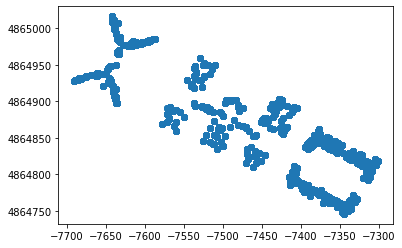

In [7]:
plt.scatter(rawtrainingdata['LONGITUDE'], rawtrainingdata['LATITUDE'])

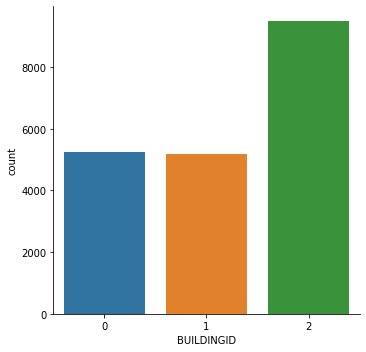

In [8]:
sns.catplot('BUILDINGID', data=rawtrainingdata, kind='count')

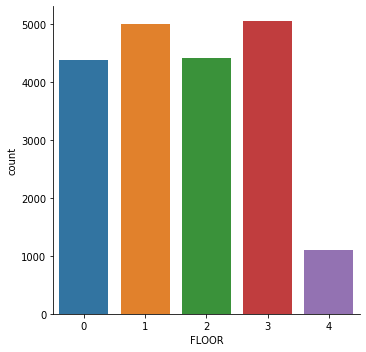

In [9]:
sns.catplot('FLOOR', data=rawtrainingdata, kind='count')

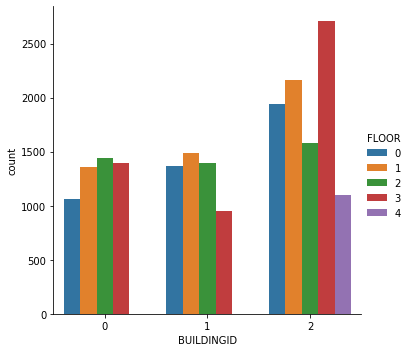

In [10]:
sns.catplot('BUILDINGID', data=rawtrainingdata, kind='count',hue='FLOOR')

In [11]:
# convert to categorical
rawtrainingdata['FLOOR'] = pd.Categorical(rawtrainingdata['FLOOR'])
rawtrainingdata['BUILDINGID'] = pd.Categorical(rawtrainingdata['BUILDINGID'])
rawtrainingdata['SPACEID'] = pd.Categorical(rawtrainingdata['SPACEID'])
rawtrainingdata['RELATIVEPOSITION'] = pd.Categorical(rawtrainingdata['RELATIVEPOSITION'])
rawtrainingdata['USERID'] = pd.Categorical(rawtrainingdata['USERID'])
rawtrainingdata['PHONEID'] = pd.Categorical(rawtrainingdata['PHONEID'])

In [12]:
# create location attribute

rawtrainingdata['LOCATION'] = rawtrainingdata['BUILDINGID'].astype(str) +  rawtrainingdata['FLOOR'].astype(str) + rawtrainingdata['SPACEID'].astype(str) +  rawtrainingdata['RELATIVEPOSITION'].astype(str)

In [13]:
rawtrainingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 530 entries, WAP001 to LOCATION
dtypes: category(6), float64(2), int64(521), object(1)
memory usage: 79.8+ MB


In [14]:
#remove other location type columns
LOCtrainingdata = rawtrainingdata.drop(columns=['FLOOR', 'SPACEID' , 'RELATIVEPOSITION', 'LONGITUDE', 'LATITUDE', 'USERID', 'PHONEID', 'TIMESTAMP'])

In [15]:
LOCtrainingdata.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1,121062
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1,121062
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,1,121032
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1,121022
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,0,001222


In [16]:
#split into 3 training sets - 1 for each building

B0trainingdata=LOCtrainingdata[LOCtrainingdata['BUILDINGID'] == 0]
B1trainingdata=LOCtrainingdata[LOCtrainingdata['BUILDINGID'] == 1]
B2trainingdata=LOCtrainingdata[LOCtrainingdata['BUILDINGID'] == 2]

In [17]:
#drop building ID after split

B0trainingdata = B0trainingdata.drop(columns=['BUILDINGID'])
B1trainingdata = B1trainingdata.drop(columns=['BUILDINGID'])
B2trainingdata = B2trainingdata.drop(columns=['BUILDINGID'])

In [18]:
B0trainingdata

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001222
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001022
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001102
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001112
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,032282
18493,100,100,100,100,100,100,100,100,-75,100,...,100,100,100,100,100,100,100,100,100,032362
18494,100,100,100,100,100,100,100,100,-88,100,...,100,100,100,100,100,100,100,100,100,032352
18496,100,100,100,100,100,100,100,100,-66,100,...,100,100,100,100,100,100,100,100,100,032302


In [19]:
B0trainingdata['LOCATION'] = pd.Categorical(B0trainingdata['LOCATION'])
B1trainingdata['LOCATION'] = pd.Categorical(B1trainingdata['LOCATION'])
B2trainingdata['LOCATION'] = pd.Categorical(B2trainingdata['LOCATION'])

In [40]:
B0trainingdata

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001222
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001022
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001102
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001112
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,032282
18493,100,100,100,100,100,100,100,100,-75,100,...,100,100,100,100,100,100,100,100,100,032362
18494,100,100,100,100,100,100,100,100,-88,100,...,100,100,100,100,100,100,100,100,100,032352
18496,100,100,100,100,100,100,100,100,-66,100,...,100,100,100,100,100,100,100,100,100,032302


###TRAIN/TEST OOB DATASETS

In [21]:
# Datasets

#Building 0

X0=B0trainingdata.iloc[:,0:520]
Y0=B0trainingdata.iloc[:,-1]

#Building 1

X1=B1trainingdata.iloc[:,0:520]
Y1=B1trainingdata.iloc[:,-1]

#Building 2

X2=B2trainingdata.iloc[:,0:520]
Y2=B2trainingdata.iloc[:,-1]


In [57]:
# train test OOB

validation_size = 0.3
seed = 9001

X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0,
test_size=validation_size, random_state=seed)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1,
test_size=validation_size, random_state=seed)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2,
test_size=validation_size, random_state=seed)

In [58]:
print(X0.shape)
print(X1.shape)
print(X2.shape)

(5249, 520)
(5196, 520)
(9492, 520)


In [23]:
### RFE datasets
#Building 0

X0RFE = B0trainingdata.iloc[:,0:520]
Y0RFE = B0trainingdata.iloc[:,-1]
print(X0RFE.shape)

#Building 1

X1RFE = B1trainingdata.iloc[:,0:520]
Y1RFE = B1trainingdata.iloc[:,-1]
print(X1RFE.shape)

#Building 2
X2RFE = B2trainingdata.iloc[:,0:520]
Y2RFE = B2trainingdata.iloc[:,-1]
print(X2RFE.shape)

(5249, 520)
(5196, 520)
(9492, 520)


In [26]:
estimator = DecisionTreeClassifier()
RFEselector = RFE(estimator)
RFEFIT = RFEselector.fit(X0RFE, Y0RFE)

In [32]:
RFE0features = RFEselector.get_support(1)
RFE0featuresname = X0RFE[X0RFE.columns[RFE0features]]

In [50]:
trainRFE0 = pd.concat([RFE0featuresname, B0trainingdata[['LOCATION']]], axis=1)
trainRFE0.head()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,LOCATION
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001222
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001022
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001102
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001112
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001072


In [34]:
estimator = DecisionTreeClassifier()
RFEFIT1 = RFEselector.fit(X1RFE, Y1RFE)

In [35]:
RFE1features = RFEselector.get_support(1)
RFE1featuresname = X1RFE[X1RFE.columns[RFE1features]]

In [51]:
trainRFE1 = pd.concat([RFE1featuresname, B1trainingdata[['LOCATION']]], axis=1)
trainRFE1.head()

,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP491,WAP495,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,121062
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,121062
2,100,100,-97,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,121032
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,121022
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,121052


In [36]:
estimator = DecisionTreeClassifier()
RFEFIT2 = RFEselector.fit(X2RFE, Y2RFE)

In [37]:
RFE2features = RFEselector.get_support(1)
RFE2featuresname = X2RFE[X2RFE.columns[RFE2features]]

In [52]:
trainRFE2 = pd.concat([RFE2featuresname, B2trainingdata[['LOCATION']]], axis=1)
trainRFE2.head()

,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,...,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,LOCATION
46,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-93,232472
47,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-89,232482
49,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,232471
50,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-90,232462
51,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-92,232452


# train/test RFE


In [59]:

XRFE0 = trainRFE0.iloc[:,0:260]
YRFE0 = trainRFE0.iloc[:,-1]

XRFE1 = trainRFE1.iloc[:,0:260]
YRFE1 = trainRFE1.iloc[:,-1]

XRFE2 = trainRFE2.iloc[:,0:260]
YRFE2 = trainRFE2.iloc[:,-1]


In [60]:
validation_size = 0.3
seed = 9001

In [61]:

XRFE0_train, XRFE0_test, YRFE0_train, YRFE0_test = train_test_split(XRFE0, YRFE0,
test_size=validation_size, random_state=seed)

XRFE1_train, XRFE1_test, YRFE1_train, YRFE1_test = train_test_split(XRFE1, YRFE1,
test_size=validation_size, random_state=seed)

XRFE2_train, XRFE2_test, YRFE2_train, YRFE2_test = train_test_split(XRFE2, YRFE2,
test_size=validation_size, random_state=seed)

## OOB Models


In [62]:

#building 0
models0 = []
models0.append(('KNN0', KNeighborsClassifier()))
models0.append(('CART0', DecisionTreeClassifier()))
models0.append(('RF0', RandomForestClassifier(n_estimators=100)))

folds = 10
seed= 9001
scoring = 'accuracy'

In [65]:
results0 = []
names0 = []
for name, model in models0:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv0 = cross_val_score(model, X0_train, Y0_train, cv=kfold, scoring=scoring)
    results0.append(cv0)
    names0.append(name)
    msg0 = "%s: %f" % (name, cv0.mean())
    print(msg0)

KNN0: 0.522307
CART0: 0.557419
RF0: 0.735696


In [66]:
#building 1
models1 = []
models1.append(('KNN1', KNeighborsClassifier()))
models1.append(('CART1', DecisionTreeClassifier()))
models1.append(('RF1', RandomForestClassifier(n_estimators=100)))

folds = 10
seed= 9001
scoring = 'accuracy'

In [68]:
results1 = []
names1 = []
for name, model in models1:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv1 = cross_val_score(model, X1_train, Y1_train, cv=kfold, scoring=scoring)
    results1.append(cv1)
    names1.append(name)
    msg1 = "%s: %f" % (name, cv1.mean())
    print(msg1)

KNN1: 0.604626
CART1: 0.672524
RF1: 0.836678


In [69]:
#building 2
models2 = []
models2.append(('KNN2', KNeighborsClassifier()))
models2.append(('CART2', DecisionTreeClassifier()))
models2.append(('RF2', RandomForestClassifier(n_estimators=100)))

folds = 10
seed= 9001
scoring = 'accuracy'

In [70]:
results2 = []
names2 = []
for name, model in models2:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv2 = cross_val_score(model, X2_train, Y2_train, cv=kfold, scoring=scoring)
    results2.append(cv2)
    names2.append(name)
    msg2 = "%s: %f" % (name, cv2.mean())
    print(msg2)

KNN2: 0.584445
CART2: 0.538987
RF2: 0.790791


## RFE MODELS


In [76]:
## RFE MODELS

#building 0
modelsRFE0 = []
modelsRFE0.append(('KNNRFE0', KNeighborsClassifier()))
modelsRFE0.append(('CARTRFE0', DecisionTreeClassifier()))
modelsRFE0.append(('RFRFE0', RandomForestClassifier(n_estimators=100)))

folds = 10
seed= 9001
scoring = 'accuracy'

In [77]:
resultsRFE0 = []
namesRFE0 = []
for name, model in modelsRFE0:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cvRFE0 = cross_val_score(model, XRFE0_train, YRFE0_train, cv=kfold, scoring=scoring)
    resultsRFE0.append(cvRFE0)
    namesRFE0.append(name)
    msgRFE0 = "%s: %f" % (name, cvRFE0.mean())
    print(msgRFE0)

KNNRFE0: 0.523945
CARTRFE0: 0.548986
RFRFE0: 0.745221


In [74]:
#building 1
modelsRFE1 = []
modelsRFE1.append(('KNNRFE1', KNeighborsClassifier()))
modelsRFE1.append(('CARTRFE1', DecisionTreeClassifier()))
modelsRFE1.append(('RFRFE1', RandomForestClassifier(n_estimators=100)))

folds = 10
seed= 9001
scoring = 'accuracy'

In [75]:
resultsRFE1 = []
namesRFE1 = []
for name, model in modelsRFE1:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cvRFE1 = cross_val_score(model, XRFE1_train, YRFE1_train, cv=kfold, scoring=scoring)
    resultsRFE1.append(cvRFE1)
    namesRFE1.append(name)
    msgRFE1 = "%s: %f" % (name, cvRFE1.mean())
    print(msgRFE1)

KNNRFE1: 0.606277
CARTRFE1: 0.679679
RFRFE1: 0.835308


In [78]:
#building 2
modelsRFE2 = []
modelsRFE2.append(('KNNRFE2', KNeighborsClassifier()))
modelsRFE2.append(('CARTRFE2', DecisionTreeClassifier()))
modelsRFE2.append(('RFRFE2', RandomForestClassifier(n_estimators=100)))

folds = 10
seed= 9001
scoring = 'accuracy'

In [79]:
resultsRFE2 = []
namesRFE2 = []
for name, model in modelsRFE2:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cvRFE2 = cross_val_score(model, XRFE2_train, YRFE2_train, cv=kfold, scoring=scoring)
    resultsRFE2.append(cvRFE2)
    namesRFE2.append(name)
    msgRFE2 = "%s: %f" % (name, cvRFE2.mean())
    print(msgRFE2)

KNNRFE2: 0.584142
CARTRFE2: 0.545762
RFRFE2: 0.800122


## MODEL TUNING WITH RANDOM FOREST RFE DATASET  building 0, 2 and OOB dataset building 1


In [80]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [120]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random1 = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [121]:
RF0RFE = rf_random.fit(XRFE0_train, YRFE0_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.6min finished


In [122]:
RF0RFE.best_score_

0.7517635943266195

In [123]:
RF0RFE.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [124]:
RF1OOB = rf_random1.fit(X1_train, Y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\azzur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.0min finished


In [125]:
RF1OOB.best_score_

0.8507017849352949

In [126]:
RF1OOB.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [127]:
parameters = {
  'n_estimators':[1,10,100,1000],
  'min_samples_split': [2,3,4,5]
  }

In [128]:
rf = RandomForestClassifier()
gd = GridSearchCV(rf,parameters)

In [129]:
RF2RFE = gd.fit(XRFE2_train, YRFE2_train)

C:\Users\azzur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [130]:
RF2RFE.best_params_


{'min_samples_split': 2, 'n_estimators': 1000}

In [131]:
RF2RFE.best_score_

0.8162261914475056

#### PREDICTIONS 

In [132]:
## building 0

In [136]:
YRFE0

4        001222
7119     001022
7120     001102
7121     001112
7122     001072
          ...  
18492    032282
18493    032362
18494    032352
18496    032302
18497    032292
Name: LOCATION, Length: 5249, dtype: category
Categories (259, object): [001022, 001062, 001072, 001102, ..., 032312, 032342, 032352, 032362]

In [138]:
PredB0RFE = RF0RFE.predict(XRFE0_test)

In [140]:
print("Accuracy: {}".format(rf_random.score(XRFE0_test, YRFE0_test)))
print(classification_report(YRFE0_test, PredB0RFE))

Accuracy: 0.7561904761904762
              precision    recall  f1-score   support

      001022       0.83      0.83      0.83         6
      001062       0.67      1.00      0.80         4
      001072       1.00      0.67      0.80         6
      001102       1.00      1.00      1.00         1
      001112       0.62      0.83      0.71         6
      001122       0.83      0.62      0.71         8
      001132       0.67      0.67      0.67         3
      001142       0.86      0.67      0.75         9
      001152       1.00      1.00      1.00         3
      001162       1.00      1.00      1.00         4
      001172       1.00      0.33      0.50         3
      001182       1.00      1.00      1.00         3
      001192       0.67      0.80      0.73         5
      001202       0.67      0.67      0.67        12
      001212       0.45      1.00      0.62         5
      001222       0.38      0.60      0.46         5
      001232       0.60      0.27      0.37        1

C:\Users\azzur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
## building 1

In [141]:
PredB1 = RF1OOB.predict(X1_test)

In [142]:
print("Accuracy: {}".format(rf_random1.score(X1_test, Y1_test)))
print(classification_report(Y1_test, PredB1))

Accuracy: 0.8627325208466966
              precision    recall  f1-score   support

       10101       1.00      0.83      0.91         6
       10102       1.00      1.00      1.00         4
      101072       1.00      1.00      1.00         7
      101082       1.00      1.00      1.00         2
        1011       1.00      1.00      1.00         2
      101102       1.00      1.00      1.00         5
      101112       1.00      1.00      1.00        12
      101122       1.00      0.75      0.86         4
      101132       0.86      1.00      0.92         6
      101142       1.00      1.00      1.00         4
      101152       1.00      1.00      1.00         6
      101162       1.00      1.00      1.00         4
      101172       1.00      1.00      1.00        11
      101182       1.00      1.00      1.00         5
      101192       1.00      1.00      1.00         4
        1012       0.90      1.00      0.95         9
      101212       1.00      1.00      1.00         

C:\Users\azzur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\azzur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## building 2

In [144]:
PredRFEB2 = RF2RFE.predict(XRFE2_test)

In [145]:
print("Accuracy: {}".format(gd.score(XRFE2_test, YRFE2_test)))
print(classification_report(YRFE2_test, PredRFEB2))

Accuracy: 0.8233848314606742
              precision    recall  f1-score   support

      201012       1.00      0.78      0.88         9
      201031       0.86      1.00      0.92         6
      201032       0.64      0.82      0.72        11
      201041       0.83      0.62      0.71         8
      201042       0.95      0.91      0.93        23
      201062       1.00      0.88      0.93         8
      201071       1.00      0.83      0.91         6
      201072       0.57      0.80      0.67         5
      201082       0.94      0.84      0.89        19
      201102       1.00      0.89      0.94         9
      201112       1.00      0.90      0.95        10
      201121       0.62      1.00      0.77         5
      201122       0.80      0.50      0.62         8
      201132       1.00      1.00      1.00         6
      201172       0.88      0.58      0.70        12
      201182       0.67      0.91      0.77        11
      201192       1.00      0.77      0.87        1

C:\Users\azzur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  SAVE MODELS

In [146]:
# save best model 
B0Modelfile = 'B0Modelfile.sav'
dump(rf_random, open(B0Modelfile, 'wb'))
# load model & print result
loaded_modelB0 = load(open(B0Modelfile, 'rb'))
result = loaded_modelB0.score(XRFE0_test, YRFE0_test)
print(result)

0.7561904761904762


In [149]:
# save best model 
B1Modelfile = 'B1Modelfile.sav'
dump(rf_random1, open(B1Modelfile, 'wb'))
# load model & print result
loaded_modelB1 = load(open(B1Modelfile, 'rb'))
result1 = loaded_modelB1.score(X1_test, Y1_test)
print(result1)

0.8627325208466966


In [150]:
# save best model 
B2Modelfile = 'B2Modelfile.sav'
dump(gd, open(B2Modelfile, 'wb'))
# load model & print result
loaded_modelB2 = load(open(B2Modelfile, 'rb'))
result2 = loaded_modelB2.score(XRFE2_test, YRFE2_test)
print(result2)

0.8233848314606742
